# Bag of N-grams (Bigrams and Trigrams)

**Bag of N-grams** concept with **n = 2** (bigrams) and **n = 3** (trigrams), and represent their presence in the texts using binary vectors.
We can increase n to create N-grams, capturing sequences of n consecutive words
When n=1, we get a Bag of Words (BOW) representation, treating each word as a separate feature
---

** Examples Bigrams:**

Text1: "I love programming"
Text 2: "Programming is fun fun"
***Extract Bigrams (n=2)***

- **Bigrams Text 1**:
  1. ("I", "love")
  2. ("love", "programming")

- **Bigrams Text 2**:
  1. ("Programming", "is")
  2. ("is", "fun")
  3. ("fun", "fun")

### **Create a List of Unique Bigrams**

- ("I", "love")
- ("love", "programming")
- ("Programming", "is")
- ("is", "fun")
- ("fun", "fun")

---
### **Bigram Vector Representation**

- **Unigrams**: ("I"), ("love"), ("programming"), ("Programming"), ("is"), ("fun")
- **Bigrams**: ("I", "love"), ("love", "programming"), ("Programming", "is"), ("is", "fun"), ("fun", "fun")


| Feature                             | T1  | T2  |
|-------------------------------------|-----|-----|
| **("I")**                           |  1  |  0  |
| **("love")**                        |  1  |  0  |
| **("programming")**                 |  1  |  0  |
| **("Programming")**                 |  0  |  1  |
| **("is")**                          |  0  |  1  |
| **("fun")**                         |  0  |  1  |
| **("I", "love")**                   |  1  |  0  |
| **("love", "programming")**         |  1  |  0  |
| **("Programming", "is")**           |  0  |  1  |
| **("is", "fun")**                   |  0  |  1  |
| **("fun", "fun")**                  |  0  |  1  |

---






In [1]:
import pandas as pd
text1 = "I love programming"
text2 = "the programming is fun fun"

# Step 1: Create a DataFrame
df = pd.DataFrame({
    'Text': [text1, text2],
    'Label': ['Text 1', 'Text 2']
})

# Display the DataFrame
print(df)

                         Text   Label
0          I love programming  Text 1
1  the programming is fun fun  Text 2


In [2]:
print(df.Text)

0            I love programming
1    the programming is fun fun
Name: Text, dtype: object


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range=(1,1))   #countvectorizer is used for BOW  n_grams = 1

Vec_Text = v.fit_transform(df.Text)
print(Vec_Text.toarray())

print(v.get_feature_names_out())


[[0 0 1 1 0]
 [2 1 0 1 1]]
['fun' 'is' 'love' 'programming' 'the']


In [6]:
v = CountVectorizer(ngram_range=(1,2))   #countvectorizer with n_grams = 2  i.e Bigrams

Vec_Text = v.fit_transform(df.Text)
print(Vec_Text.toarray())

print(v.get_feature_names_out())

[[0 0 0 0 1 1 1 0 0 0]
 [2 1 1 1 0 0 1 1 1 1]]
['fun' 'fun fun' 'is' 'is fun' 'love' 'love programming' 'programming'
 'programming is' 'the' 'the programming']


In [19]:
v = CountVectorizer(ngram_range=(1,3))   #countvectorizer with n_grams = 3  i.e trigrams

Vec_Text = v.fit_transform(df.Text)
print(Vec_Text.toarray())

print(v.get_feature_names_out())
print("========================")
print(v.vocabulary_)

[[0 0 0 0 0 1 1 1 0 0 0 0 0]
 [2 1 1 1 1 0 0 1 1 1 1 1 1]]
['fun' 'fun fun' 'is' 'is fun' 'is fun fun' 'love' 'love programming'
 'programming' 'programming is' 'programming is fun' 'the'
 'the programming' 'the programming is']
{'love': 5, 'programming': 7, 'love programming': 6, 'the': 10, 'is': 2, 'fun': 0, 'the programming': 11, 'programming is': 8, 'is fun': 3, 'fun fun': 1, 'the programming is': 12, 'programming is fun': 9, 'is fun fun': 4}


# 1. Sentiment Analysis

**Objective**: Create a model to classify tweets into positive, negative.

In [20]:
#importing Libraries

import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [31]:
#  Loading the dataset
data = pd.read_csv("/content/movies_sentiment_data.csv", encoding='ISO-8859-1', nrows=10000)


In [32]:
print(data.head())

                                              review sentiment
0  I first saw Jake Gyllenhaal in Jarhead (2005) ...  positive
1  I enjoyed the movie and the story immensely! I...  positive
2  I had a hard time sitting through this. Every ...  negative
3  It's hard to imagine that anyone could find th...  negative
4  This is one military drama I like a lot! Tom B...  positive


In [33]:
# Print unique sentiment labels in the dataset
print(data['sentiment'].unique())

['positive' 'negative']


In [34]:
#encoding labels
data['label'] = data['sentiment'].map({'negative' : 0, 'positive': 1})
data.head()

,review,sentiment,label
0,I first saw Jake Gyllenhaal in Jarhead (2005) ...,positive,1
1,I enjoyed the movie and the story immensely! I...,positive,1
2,I had a hard time sitting through this. Every ...,negative,0
3,It's hard to imagine that anyone could find th...,negative,0
4,This is one military drama I like a lot! Tom B...,positive,1


In [35]:
data['sentiment'].value_counts()

,count
sentiment,
positive,5017
negative,4983


In [40]:
# prepreocessing  (take around 5 to 10 minutes)
import spacy
nlp = spacy.load("en_core_web_sm")

tokens = []
for doc in nlp.pipe(data['review'], batch_size=500, disable=['ner', 'parser'], n_process=-1):
    tokens.append([token.lemma_ for token in doc if not token.is_punct])

data['preprocessed_sentiment'] = pd.Series(tokens).apply(lambda x: " ".join(x))
data['preprocessed_sentiment'].head(5)

,preprocessed_sentiment
0,I first see Jake Gyllenhaal in Jarhead 2005 a ...
1,I enjoy the movie and the story immensely I ha...
2,I have a hard time sit through this every sing...
3,it be hard to imagine that anyone could find t...
4,this be one military drama I like a lot Tom Be...


Endcoding labels 0 and 1 for negative and positive sentiment


In [37]:
# Applying bigram using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2), max_features=5000)
X = vectorizer.fit_transform(data['preprocessed_sentiment']).toarray()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42,  stratify=data.label)


Accuracy: 63.10%
Confusion Matrix:
[[607 390]
 [348 655]]


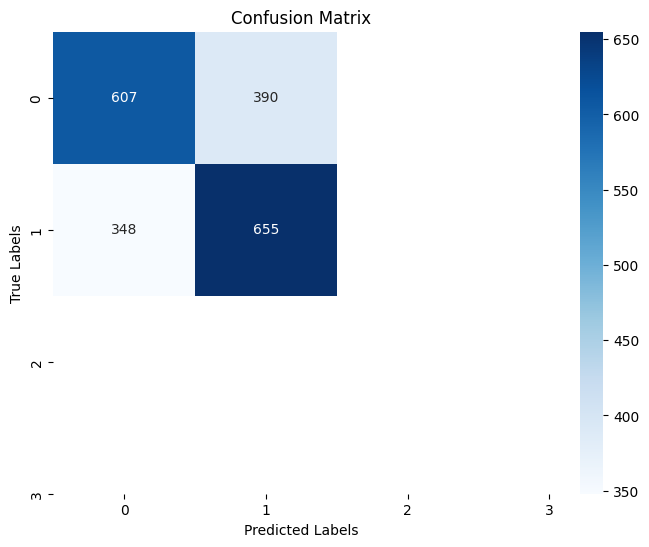

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.neighbors import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

# Step 13: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
#  Applying Trigrams
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,3), max_features=5000)
X = vectorizer.fit_transform(data.preprocessed_sentiment).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.3, random_state=42, stratify=data.label )


Accuracy: 63.47%
Confusion Matrix:
[[993 502]
 [594 911]]


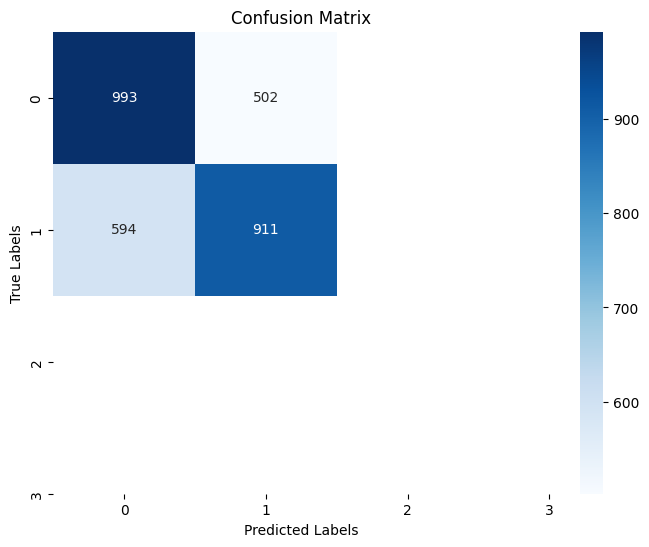

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()